#Simple Neural Network using Numpy

This Notebook will show implementation of Simple Nueral Network using Numpy and Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc, sigmoid
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Dataset


In [3]:
X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


Let's plot the coffee roasting data below. The two features are Temperature in Celsius and Duration in minutes. Coffee Roasting at Home suggests that the duration is best kept between 12 and 15 minutes while the temp should be between 175 and 260 degrees Celsius. Of course, as temperature rises, the duration should shrink.

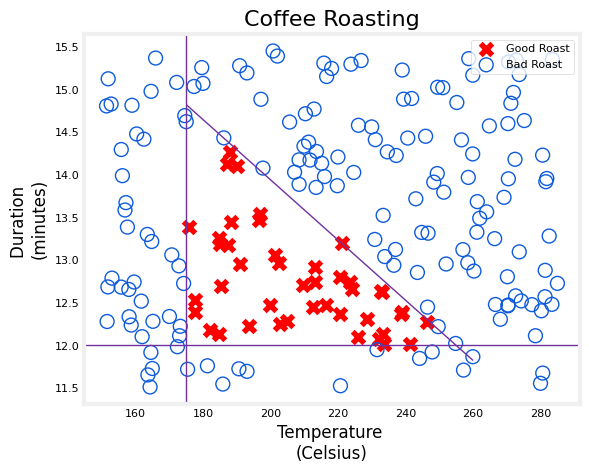

In [4]:
plt_roast(X,Y)

### Normalize Data
Fitting the weights to the data (back-propagation, will proceed more quickly if the data is normalized.
The procedure below uses a Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). It has the following steps:
- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.  
It is important to apply normalization to any future data that utilizes the learned model.

In [5]:
print(np.min(X[:, 0]))

151.32372212128612


In [6]:
print(f"Max, Min of Temperature before Normalization: {np.max(X[:, 0]):0.2f}, {np.min(X[:, 0]):0.2f}")
print(f"Max, Min of Duration before Normalization: {np.max(X[:, 1]):0.2f}, {np.min(X[:, 1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis = -1)
norm_l.adapt(X)
Xn = norm_l(X)
print(f"Max, Min of Temperature after Normalization: {np.max(Xn[:, 0]):0.2f}, {np.min(Xn[:, 0]):0.2f}")
print(f"Max, Min of Duration after Normalization: {np.max(Xn[:, 1]):0.2f}, {np.min(Xn[:, 1]):0.2f}")



Max, Min of Temperature before Normalization: 284.99, 151.32
Max, Min of Duration before Normalization: 15.45, 11.51
Max, Min of Temperature after Normalization: 1.66, -1.69
Max, Min of Duration after Normalization: 1.79, -1.70


In [45]:
def sigmoid(z):
  z = np.clip(z, -500, 500)
  g = 1.0 / (1.0 + np.exp(-z))
  return g

In [46]:
def my_dense(a_in, W, b):
  units = W.shape[1]
  a_out = np.zeros(units)
  for i in range (units):
    w = W[:,i]
    z = np.dot(w, a_in) + b[i]
    a_out[i] = sigmoid(z)
  return(a_out)


Instead of a for loop we can also do

Z = np.matmul(W.T, a_in) + b
or

Z = W.T @ a_in + b

Z is an array of numbers rather than a single number

a_out = sigmoid(z)

The following cell builds a two-layer nueral network utilizing the my_dense subroutine above.


In [61]:
def my_sequential(x, W1, b1, W2, b2):
  a1 = my_dense(x, W1, b1)
  a2 = my_dense(a1, W2, b2)
  return (a2)

In [48]:
print("X:", X.shape)
print("W:", W1_tmp.shape)
print("b:", b1_tmp.shape)

X: (200, 2)
W: (2, 3)
b: (3,)


Intializing random weights and bias

In [49]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

Let's start by writing a routine for prediction. This will take a matrix  𝑋
  with all  𝑚
  examples in the rows and make a prediction by running the model.

In [62]:
def my_predict(X, W1, b1, W2, b2):
  m = X.shape[0]
  p = np.zeros((m,1))
  for i in range(m):
    p[i, 0] = my_sequential(X[i], W1, b1, W2, b2)
  return (p)

We can try this routine on two examples:

In [63]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = my_predict(X_testn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

/tmp/ipython-input-2576510713.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i, 0] = my_sequential(X[i], W1, b1, W2, b2)


In [64]:
print(predictions)

[[9.72e-01]
 [3.29e-08]]


To convert the probabilities to a decision, we apply a threshold:

In [65]:
yhat = np.zeros_like(predictions)

yhat = (predictions >= 0.5).astype(int)

print(f"decisions = \n{yhat}")


decisions = 
[[1]
 [0]]


Network function
This graph shows the operation of the whole network and is identical to the Tensorflow in the end of this notebook. The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network

/tmp/ipython-input-2576510713.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i, 0] = my_sequential(X[i], W1, b1, W2, b2)


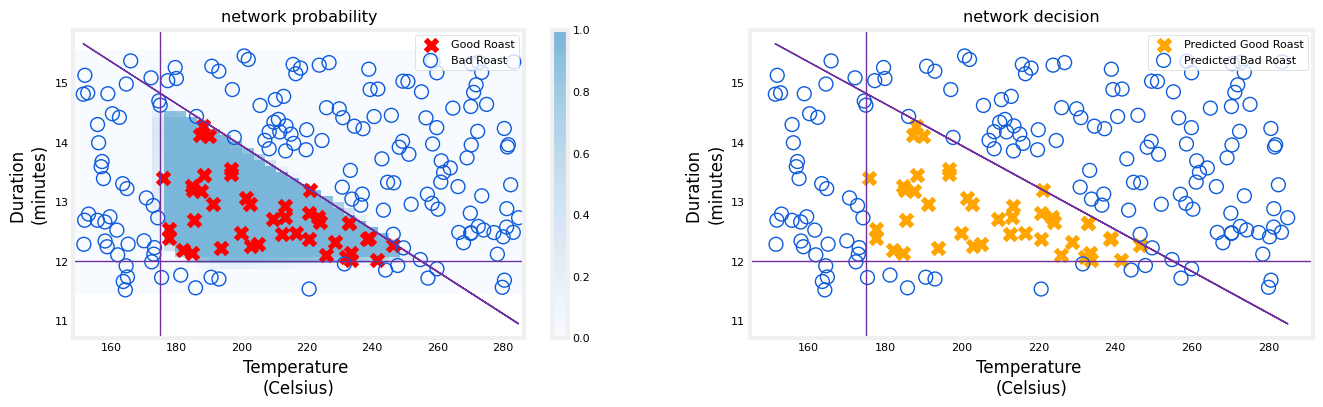

In [66]:
netf= lambda x : my_predict(norm_l(x),W1_tmp, b1_tmp, W2_tmp, b2_tmp)
plt_network(X,Y,netf)

#Simple Neural Network using Tensorflow

Till the normalization part we follow the same procedure as the above part in Numpy

Tile/copy our data to increase the training set size and reduce the number of training epochs.

In [7]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [8]:
tf.random.set_seed(1234)

model = Sequential(
  [
    tf.keras.Input(shape=(2,)),
    Dense(3, activation = 'sigmoid', name = 'layer1'),
    Dense(1, activation = 'sigmoid', name = 'layer2')
  ]
)

>**Note 1:** The `tf.keras.Input(shape=(2,)),` specifies the expected shape of the input. This allows Tensorflow to size the weights and bias parameters at this point.  This is useful when exploring Tensorflow models. This statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the `model.fit` statement.  
>**Note 2:** Including the sigmoid activation in the final layer is not considered best practice. It would instead be accounted for in the loss which improves numerical stability.

The `model.summary()` provides a description of the network:

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [10]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


Let's examine the weights and biases Tensorflow has instantiated. The weights  𝑊
  should be of size (number of features in input, number of units in the layer) while the bias  𝑏
  size should match the number of units in the layer:

In the first layer with 3 units, we expect W to have a size of (2,3) and  𝑏
  should have 3 elements.
In the second layer with 1 unit, we expect W to have a size of (3,1) and  𝑏
  should have 1 element.

In [11]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 1.01 -0.42  0.07]
 [-0.51  0.5   0.01]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[0.41]
 [0.09]
 [1.13]] 
b2(1,): [0.]


- The `model.compile` statement defines a loss function and specifies a compile optimization.
- The `model.fit` statement runs gradient descent and fits the weights to the data.

In [12]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
)

model.fit(Xt, Yt, epochs = 10,)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3022
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1238
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1040
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0240
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0142
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0098
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0071
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0051
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0038
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0028


#### Epochs and batches
In the `fit` statement above, the number of `epochs` was set to 10. This specifies that the entire data set should be applied during training 10 times.  During training, you see output describing the progress of training that looks like this:
```
Epoch 1/10
6250/6250 [==============================] - 6s 910us/step - loss: 0.1782
```
The first line, `Epoch 1/10`, describes which epoch the model is currently running. For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches. The notation on the 2nd line `6250/6250 [====` is describing which batch has been executed.

#### Updated Weights
After fitting, the weights have been updated:

In [13]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 9.66e-03  1.46e+01  1.26e+01]
 [-9.06e+00  1.22e+01  2.76e-01]] 
b1: [-11.35   1.86  13.15]
W2:
 [[-45.1 ]
 [-42.25]
 [ 38.48]] 
b2: [-12.47]



Once you have a trained model, you can then use it to make predictions. The output of our model is a probability. In this case, the probability of a good roast. To make a decision, one must apply the probability to a threshold. In this case, we will use 0.5

In [14]:
X_test = np.array([[200, 13.9], [200,17]])
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
predictions = 
 [[9.74e-01]
 [8.77e-08]]


To convert the probabilities to a decision, we apply a threshold:

In [15]:
yhat = np.zeros_like(predictions)
yhat[np.where(predictions >= 0.5)] = 1
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


yhat = (predictions>=0.5).astype(int)

So what is happening is that
(predictions >= 0.5)

 → [True, False, True, False]

 astype converts True → 1, False → 0

## Layer Functions
Let's examine the functions of the units to determine their role in the coffee roasting decision. We will plot the output of each node for all values of the inputs (duration,temp). Each unit is a logistic function whose output can range from zero to one. The shading in the graph represents the output value.

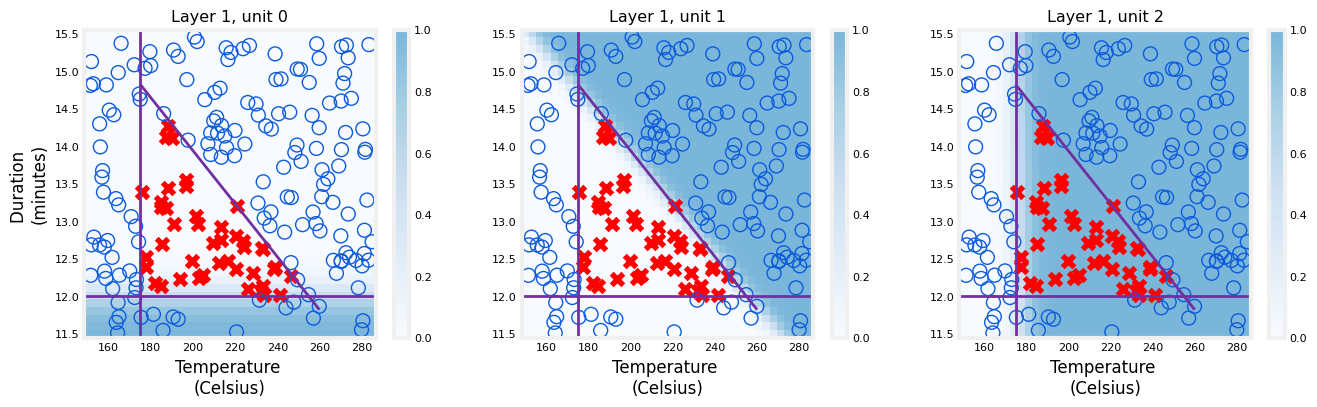

In [16]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

The shading shows that each unit is responsible for a different "bad roast" region. unit 0 has larger values when the temperature is too low. unit 1 has larger values when the duration is too short and unit 2 has larger values for bad combinations of time/temp. It is worth noting that the network learned these functions on its own through the process of gradient descent. They are very much the same sort of functions a person might choose to make the same decisions.

The function plot of the final layer is a bit more difficult to visualize. It's inputs are the output of the first layer. We know that the first layer uses sigmoids so their output range is between zero and one. We can create a 3-D plot that calculates the output for all possible combinations of the three inputs. This is shown below. Above, high output values correspond to 'bad roast' area's. Below, the maximum output is in area's where the three inputs are small values corresponding to 'good roast' area's.

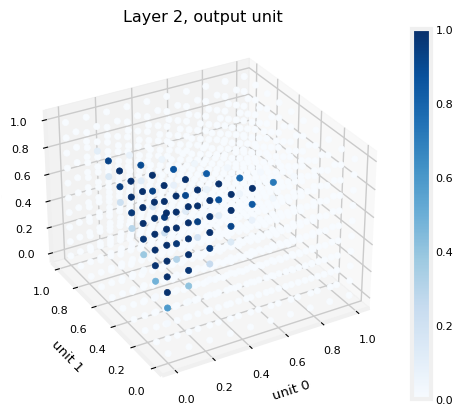

In [17]:
plt_output_unit(W2,b2)

The final graph shows the whole network in action.
The left graph is the raw output of the final layer represented by the blue shading. This is overlaid on the training data represented by the X's and O's.
The right graph is the output of the network after a decision threshold. The X's and O's here correspond to decisions made by the network.
The following takes a moment to run

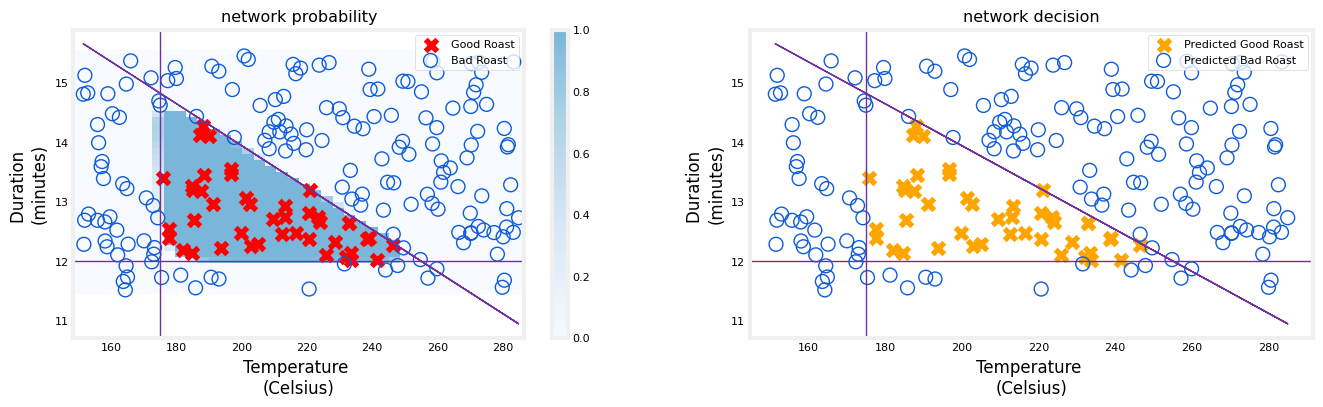

In [19]:
netf= lambda x : model.predict(norm_l(x), verbose = 0)
plt_network(X,Y,netf)